In [1]:
import numpy as np
from scipy.linalg import eigh
from sklearn.cluster import KMeans
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt


# --- Generate 3 circles ---
n_samples = 500
theta = np.linspace(0, 2*np.pi, n_samples//3, endpoint=False)

circle1 = np.column_stack([np.cos(theta), np.sin(theta)]) * 1.0
circle2 = np.column_stack([np.cos(theta), np.sin(theta)]) * 2.0
circle3 = np.column_stack([np.cos(theta), np.sin(theta)]) * 3.0

X = np.vstack([circle1, circle2, circle3])
X += 0.05 * np.random.randn(*X.shape)  # add small noise



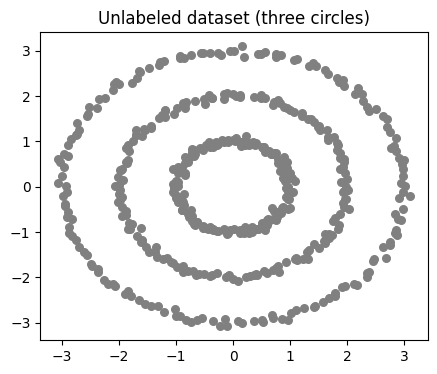

In [2]:
# Plot the unlabeled dataset before clustering
plt.figure(figsize=(5,4))
plt.scatter(X[:,0], X[:,1], color='gray', s=30)
plt.title("Unlabeled dataset (three circles)")
plt.show()

In [3]:
# Kmeans clustering
k = 3
km = KMeans(n_clusters=k, n_init=50, random_state=42)
labels = km.fit_predict(X)



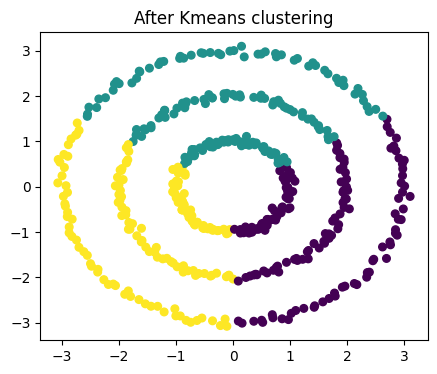

In [4]:
# Plot clustering result
plt.figure(figsize=(5,4))
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=30)
plt.title("After Kmeans clustering")
plt.show()

Spectral Clustering

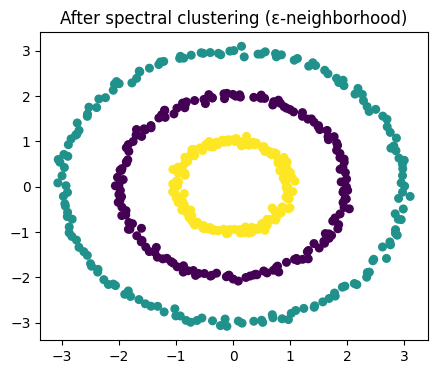

In [13]:

# Build similarity graph using ε-neighborhood
epsilon = 0.3 # neighborhood radius
# Euclidean distance
sq_dists = np.sum((X[:, None, :] - X[None, :, :])**2, axis=2)
dists = np.sqrt(sq_dists)

# Weighted Adjacency matrix
W = (dists < epsilon).astype(float)
np.fill_diagonal(W, 0)

# Degree matrix and Laplacian
D = np.diag(W.sum(axis=1))
L = D - W
# print(W)
# print(D)
# print(L)

# Eigen decomposition of Laplacian
k = 3
eigvals, eigvecs = eigh(L)
U = eigvecs[:, :k]  # first k eigenvectors

# k-means on the rows of U
km = KMeans(n_clusters=k, n_init=50, random_state=42)
labels = km.fit_predict(U)

# 7. Plot clustering result
plt.figure(figsize=(5,4))
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=30)
plt.title("After spectral clustering (ε-neighborhood)")
plt.show()